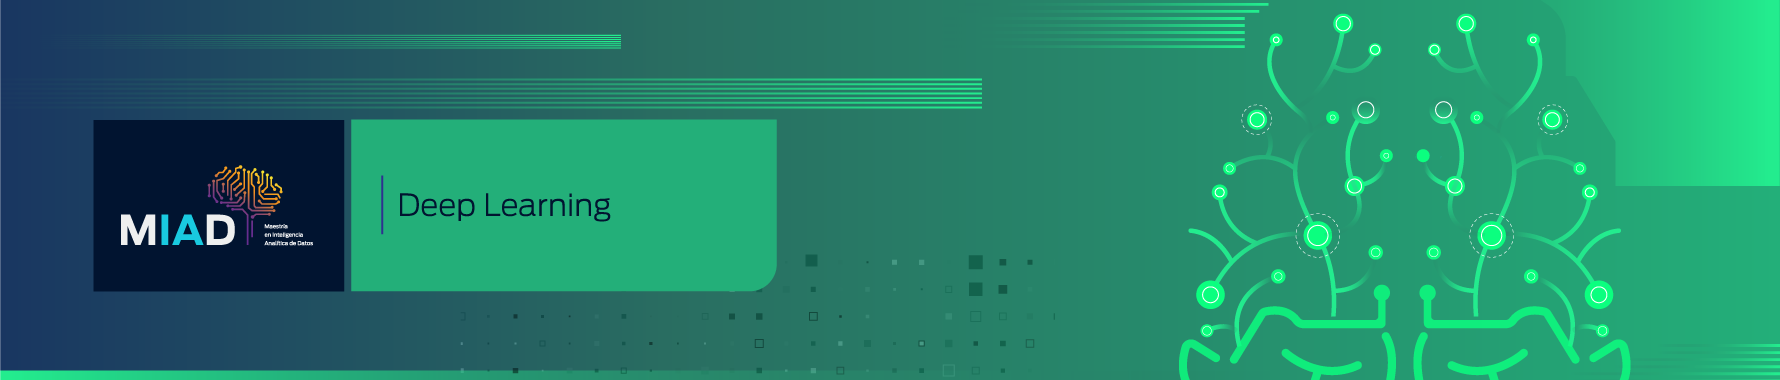

# Deep learning - Semana 3: Estrategias de implementación
# Estrategia de Normalización por Lotes _(Batch Normalization)_

### Propósito
En esta actividad se implementa y compara el desempeño del gradiente descendiente en usando _batch normalization_.

### Instrucciones generales

Esta es una actividad individual, la cual puede descargar eligiendo la opción ‘Download as’ del menú ‘File’ y descargar el archivo en formato notebook (.ipynb). También puede resolverla directamente sobre la herramienta del curso.

## Implementación en Keras de _Batch Normalization_

En este caso, uasaremos la base de datos del _National Institute of Diabetes and Digestive and Kidney Diseases_. La variable de interés 'Clase' es una variable binaria toma el valor de 1 en caso de que el paciente tenga diabetes o de 0 en caso contrario. 

Se implementará una red neuronal tipo MLP de dos capas. Además de la implementación normal, se adicionará una capa intermedia para hacer normalización y se compararán los resultados, tanto en desempeño predictivo como en tiempo de ejecución.

In [1]:
import time
import pandas as pd
from numpy import loadtxt
from matplotlib import pyplot  as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from sklearn import metrics

dataset = pd.read_csv('test2.csv', sep=",")
dataset=dataset.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.20)

Using TensorFlow backend.



En el siguiente código, se implementa una red tipo MLP con dos capas (Dense):


In [2]:
n=X_train.shape[0]

model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


Se puede observar que se tienen 221 parámetros en total, de los cuales todos son entrenables, es decir, todos serán estimados con el algoritmo de gradiente descendiente. Miremos ahora el desempeño de este modelo:

In [3]:
model.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy'])

start = time.time()

#history=model.fit(X_train, y_train, epochs=250, batch_size=128)

history=model.fit(X_train, y_train, epochs=250, batch_size=32)

end = time.time()

Epoch 1/250
614/614 [==============================] - 0s 295us/step - loss: 9.7564 - accuracy: 0.4577
Epoch 2/250
614/614 [==============================] - 0s 31us/step - loss: 4.5107 - accuracy: 0.4707
Epoch 3/250
614/614 [==============================] - 0s 33us/step - loss: 2.4632 - accuracy: 0.4805
Epoch 4/250
614/614 [==============================] - 0s 33us/step - loss: 1.8433 - accuracy: 0.4723
Epoch 5/250
614/614 [==============================] - 0s 33us/step - loss: 1.5336 - accuracy: 0.5098
Epoch 6/250
614/614 [==============================] - 0s 33us/step - loss: 1.3031 - accuracy: 0.5570
Epoch 7/250
614/614 [==============================] - 0s 29us/step - loss: 1.1783 - accuracy: 0.5619
Epoch 8/250
614/614 [==============================] - 0s 30us/step - loss: 1.0418 - accuracy: 0.5912
Epoch 9/250
614/614 [==============================] - 0s 38us/step - loss: 0.9685 - accuracy: 0.5977
Epoch 10/250
614/614 [==============================] - 0s 26us/step - loss: 0.88

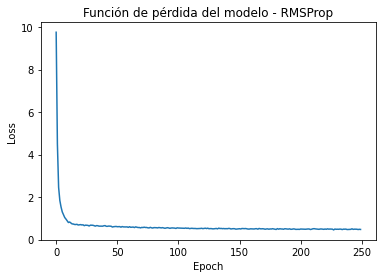

Tiempo de ejecución: 4.8685009479522705


In [4]:
plt.plot(history.history['loss'])
plt.title('Función de pérdida del modelo - RMSProp')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

print("Tiempo de ejecución: " +str(end - start))

Ahora implementamos el mismo algoritmo, pero entre la capa 1 y 2 se normalizarán las variables, para lo cual, se añade una capa en Keras llamada "BatchNormalization":

In [5]:
n=X_train.shape[0]

model_norm = Sequential()
model_norm.add(Dense(12, input_dim=8, activation='relu'))
model_norm.add(BatchNormalization())
model_norm.add(Dense(8, activation='relu'))
model_norm.add(Dense(1, activation='sigmoid'))

model_norm.compile(loss='binary_crossentropy', optimizer="rmsprop", metrics=['accuracy'])

model_norm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
batch_normalization_1 (Batch (None, 12)                48        
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 269
Trainable params: 245
Non-trainable params: 24
_________________________________________________________________


Es posible observar que el número de parámetros entrenables se incrementó a 245. Los 24 nuevos parámetros corresponden a $\gamma$ y $\beta$ por cada uno de los nodos de la primera capa. Además, hay 24 parámetros que Keras llama "no entrenables", que corresponden a las medias y las desviaciones estándar con las que se hace la normalización.

Revisemos ahora el desempeño en términos del tiempo de implementación y el "accuracy" obtenido:

In [6]:
start = time.time()

#history=model.fit(X_train, y_train, epochs=250, batch_size=128)

history_norm=model_norm.fit(X_train, y_train, epochs=250, batch_size=32)

end = time.time()

Epoch 1/250
614/614 [==============================] - 0s 369us/step - loss: 0.6826 - accuracy: 0.6482
Epoch 2/250
614/614 [==============================] - 0s 36us/step - loss: 0.6549 - accuracy: 0.6564
Epoch 3/250
614/614 [==============================] - 0s 41us/step - loss: 0.6343 - accuracy: 0.6889
Epoch 4/250
614/614 [==============================] - 0s 87us/step - loss: 0.6227 - accuracy: 0.6873
Epoch 5/250
614/614 [==============================] - 0s 37us/step - loss: 0.6041 - accuracy: 0.6775
Epoch 6/250
614/614 [==============================] - 0s 34us/step - loss: 0.5882 - accuracy: 0.6971
Epoch 7/250
614/614 [==============================] - 0s 70us/step - loss: 0.5843 - accuracy: 0.6857
Epoch 8/250
614/614 [==============================] - 0s 33us/step - loss: 0.5700 - accuracy: 0.6938
Epoch 9/250
614/614 [==============================] - 0s 38us/step - loss: 0.5560 - accuracy: 0.7182
Epoch 10/250
614/614 [==============================] - 0s 37us/step - loss: 0.54

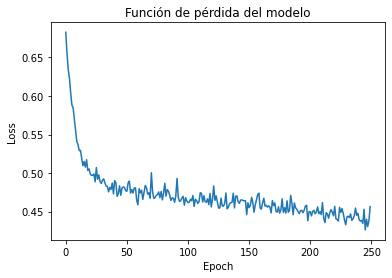

Tiempo de ejecución: 6.204039812088013


In [7]:
plt.plot(history_norm.history['loss'])
plt.title('Función de pérdida del modelo')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

print("Tiempo de ejecución: " +str(end - start))

Es importante considerar que en una red pequeña como la que se implementó, es posible que al agregar _batch normalization_ no se obtengan ventajas considerables. Sin embargo, en redes más grandes, la ventaja puede ser significativa.

Dentro de los argumentos que puede tomar la capa de "BatchNormalization", es posible activar un parámetro de _momentum,_ para que las medias y desviaciones con las que se estandarizan los datos no cambien tan drásticamente en cada iteración, sino que se estabilizan usando suavización exponencial o momento. Usando esto, el descenso en la función de pérdida tendrá menos variación.